In [130]:
# Consider there is a finance company that gives loan for people. Before approving the loan, the company must analyzes 
# several aspects  regarding people's personal situation. So, that finance company wants to automate this loan approval.
# Let's make a Loan Status Prediction system with Machine Learning.

In [131]:
# let’s import the libraries we are going to use
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [132]:
# Loading the dataset using pandas
df = pd.read_csv('LoanPredication.csv')

In [133]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2           

In [134]:
# It contains 13 columns and 614 rows.
# Columns:
# Loan_ID (Loan reference number)  
# Gender (Applicant gender)
# Married (Applicant marital status)
# Dependents (Number of family members)
# Education (Applicant education)
# Self_Employed (Applicant employment status)
# ApplicantIncome (Applicant's monthly income)
# CoapplicantIncome (Aditional applicant's monthly income)
# LoanAmount (Loan amount) 
# Loan_Amount_Term (Theloan's repayment period in days)
# Credit_History (Record of previous credit history. 0: bad credit history, 1: good credit history) 
# Property_Area (The location of property) 
# Loan_Status (Status of loan)

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing data in percentage
Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


In [135]:
# Let's know the type of data
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [136]:
# Statistical analysis of the data
# count: number of non-null data in column
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: maximum column value
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [137]:
# dropping the missing values
df = df.dropna()

In [138]:
# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))
print('Shape:', df.shape)

Missing data
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing data in percentage
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64
Shape: (480, 13)


In [139]:
# Let's transform LoanStatus column from categorical data to numerical data
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [140]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [141]:
# Replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [142]:
# Dependent column values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

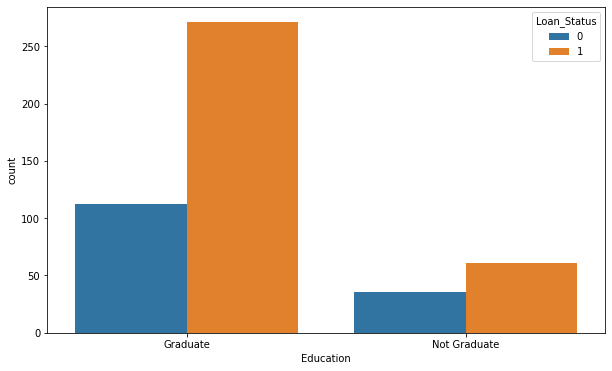

In [143]:
# Data visualization
# Education & Loan Status
plt.figure(figsize=(10,6))
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.savefig('EducationVSLoanStatus_count.jpg')
plt.show()

In [144]:
EduGraduateLoanStatus = df.loc[df.loc[:, 'Education'] == 'Graduate']['Loan_Status'].value_counts()
EduNotGraduateLoanStatus = df.loc[df.loc[:, 'Education'] == 'Not Graduate']['Loan_Status'].value_counts()

print('Total Graduate Applicant: ', EduGraduateLoanStatus.sum())
print('Total Graduate Applicant Loan Accepted: ', EduGraduateLoanStatus[1])
print('Total Graduate Applicant Loan Accepted percentage: ', EduGraduateLoanStatus[1]*100/EduGraduateLoanStatus.sum(),'%')

print('')

print('Total Not Graduate Applicant: ', EduNotGraduateLoanStatus.sum())
print('Total Not Graduate Applicant Loan Accepted: ', EduNotGraduateLoanStatus[1])
print('Total Not Graduate Applicant Loan Accepted percentage: ', EduNotGraduateLoanStatus[1]*100/EduNotGraduateLoanStatus.sum(),'%')

Total Graduate Applicant:  383
Total Graduate Applicant Loan Accepted:  271
Total Graduate Applicant Loan Accepted percentage:  70.75718015665797 %

Total Not Graduate Applicant:  97
Total Not Graduate Applicant Loan Accepted:  61
Total Not Graduate Applicant Loan Accepted percentage:  62.88659793814433 %


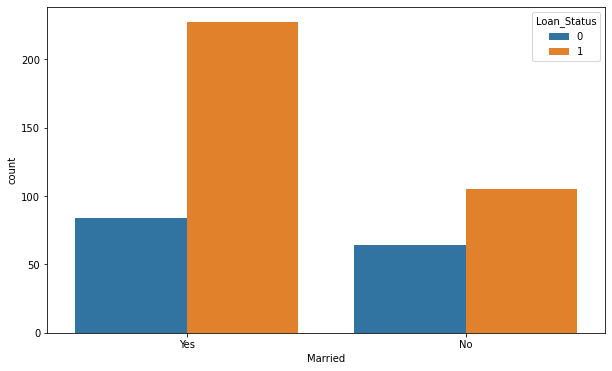

In [145]:
# Marital Status & Loan Status
plt.figure(figsize=(10,6))
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.savefig('MaritalVSLoanStatus_count.jpg')
plt.show()

In [146]:
MarriedLoanStatus = df.loc[df.loc[:, 'Married'] == 'Yes']['Loan_Status'].value_counts()
NotMarriedLoanStatus = df.loc[df.loc[:, 'Married'] == 'No']['Loan_Status'].value_counts()

print('Total Married Applicant: ', MarriedLoanStatus.sum())
print('Total Married Applicant Loan Accepted: ', MarriedLoanStatus[1])
print('Total Married Applicant Loan Accepted percentage: ', MarriedLoanStatus[1]*100/MarriedLoanStatus.sum(),'%')

print('')

print('Total Not Married Applicant: ', NotMarriedLoanStatus.sum())
print('Total Not Married Applicant Loan Accepted: ', NotMarriedLoanStatus[1])
print('Total Not Married Applicant Loan Accepted percentage: ', NotMarriedLoanStatus[1]*100/NotMarriedLoanStatus.sum(),'%')

Total Married Applicant:  311
Total Married Applicant Loan Accepted:  227
Total Married Applicant Loan Accepted percentage:  72.9903536977492 %

Total Not Married Applicant:  169
Total Not Married Applicant Loan Accepted:  105
Total Not Married Applicant Loan Accepted percentage:  62.1301775147929 %


In [147]:
# Convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},
                     inplace=True)

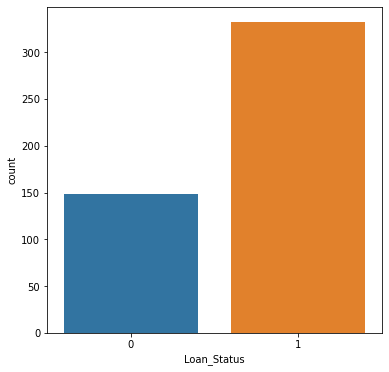

In [148]:
# Loan_Status column content 
plt.figure(figsize=(6,6))
sns.countplot(x='Loan_Status', data=df)
plt.savefig('Loan_Status_Content.jpg')
plt.show()

In [149]:
# Spliting the Features and Target
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

Y = df['Loan_Status']

In [150]:
# Splitting the Data into Training Data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 2)

In [151]:
## MACHINE LEARNING ##
# Support Vector Machine
SVM = svm.SVC(kernel= 'linear')

# Model training
SVM.fit(X_train, Y_train)

# Evaluation
# Training data
X_train_prediction = SVM.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# Test dataLogistic
X_test_prediction = SVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.7786458333333334
Accuracy on Test data :  0.8125
